In [2]:
# Setting path to Kaggle, this will create a folder named as Kaggle on google drive
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Kaggle"
%cd "/content/drive/MyDrive/Kaggle"


/content/drive/MyDrive/Kaggle


In [ ]:
# Downloading dataset from kaggle
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 42.8MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.9MB/s]


In [8]:
# Unzipping dataset
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Kaggle/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()


In [3]:
# Importing important Libararies
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [9]:
# Getting training dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.


In [10]:
# Getting testing dataset
test_data = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 5000 files belonging to 2 classes.


In [11]:

# Normalization, converting all images to 256x256
def normalization_process(image, lable):
  image = tf.cast(image/255, tf.float32)
  return image, lable

train_data = train_data.map(normalization_process)
test_data = test_data.map(normalization_process)



In [12]:
# Creating our model
model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), padding="valid", activation="relu", input_shape = (256, 256, 3)  ))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding = "valid"))

model.add(Conv2D(64, kernel_size= (3,3), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding = "valid"))

model.add(Conv2D(128, kernel_size= (3,3), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
# Fitting our model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics= ["accuracy"])
history = model.fit(train_data, epochs=10, validation_data= test_data)

Epoch 1/10
625/625 [==============================] - 70s 91ms/step - loss: 0.6054 - accuracy: 0.6581 - val_loss: 0.5328 - val_accuracy: 0.7386
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4789 - accuracy: 0.7652 - val_loss: 0.4557 - val_accuracy: 0.7844
Epoch 3/10
625/625 [==============================] - 58s 92ms/step - loss: 0.3759 - accuracy: 0.8287 - val_loss: 0.4928 - val_accuracy: 0.7926
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2420 - accuracy: 0.8956 - val_loss: 0.7407 - val_accuracy: 0.7766
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.1346 - accuracy: 0.9475 - val_loss: 0.8515 - val_accuracy: 0.7844
Epoch 6/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0786 - accuracy: 0.9717 - val_loss: 0.9895 - val_accuracy: 0.7746
Epoch 7/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0571 - accuracy: 0.9796 - val_loss: 0.9672 - val_accuracy:

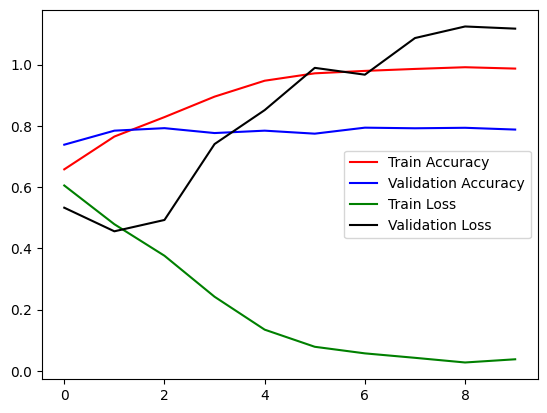

In [15]:
# Plotting accuracy, val_accuracy, loss and val_loss, Model is overfitted as there is a gap between accuracies, moreover validation loss is also increasing
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], color="red", label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], color="blue", label = "Validation Accuracy")
plt.plot(history.history["loss"], color="green", label = "Train Loss")
plt.plot(history.history["val_loss"], color="black", label = "Validation Loss")
plt.legend()
plt.show()

In [16]:
# Importing BatcNormaliztion and Dropout to mitigate the overfitting
from keras.layers import BatchNormalization, Dropout


In [17]:
# Applying BatcNormaliztion and Dropout to mitigate the overfitting

model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), padding="valid", activation="relu", input_shape = (256, 256, 3)  ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding = "valid"))

model.add(Conv2D(64, kernel_size= (3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding = "valid"))

model.add(Conv2D(128, kernel_size= (3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(.1))
model.add(Dense(1, activation="sigmoid"))


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [19]:
# Applaying EarlyStopping to improve perfomrance of model
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics= ["accuracy"])
history = model.fit(train_data, epochs=10, validation_data= test_data, callbacks=[early_stopping])

Epoch 1/10
625/625 [==============================] - 72s 110ms/step - loss: 1.2560 - accuracy: 0.5947 - val_loss: 0.6110 - val_accuracy: 0.6796
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5590 - accuracy: 0.7113 - val_loss: 0.5010 - val_accuracy: 0.7504
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4772 - accuracy: 0.7740 - val_loss: 0.4942 - val_accuracy: 0.7688
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4035 - accuracy: 0.8182 - val_loss: 0.4255 - val_accuracy: 0.8074
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3474 - accuracy: 0.8479 - val_loss: 0.4773 - val_accuracy: 0.7950
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2663 - accuracy: 0.8904 - val_loss: 0.5653 - val_accuracy: 0.7880
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1941 - accuracy: 0.9197 - val_loss: 0.6134 - val_ac

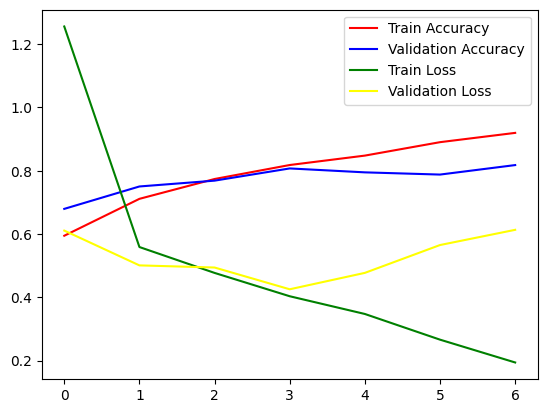

In [20]:
# Plotting after removing overfitting
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], color="red", label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], color="blue", label = "Validation Accuracy")
plt.plot(history.history["loss"], color="green", label = "Train Loss")
plt.plot(history.history["val_loss"], color="yellow", label = "Validation Loss")
plt.legend()
plt.show()